Pipeline API
1. Text Classification
    定义：将一段文本自动分配到一个或多个预定义的类别中
    分类：Sentiment Analysis、内容分类
1.1 Sentiment Analysis
   定义：将文本归类为积极或消极
   模型介绍：roberta-base-finetuned-dianping-chinese是基于RoBERTa-base（中文版本）的二分类微调模型，专为京东（JD）场景的文本分类任务设计，例如电商评论情感分析（正面/负面）

In [13]:
import os

os.environ['http_proxy'] = 'socks5://127.0.0.1:1080'
os.environ['https_proxy'] = 'socks5://127.0.0.1:1080'

from transformers import pipeline

pipe = pipeline(
    task="sentiment-analysis",
    model="uer/roberta-base-finetuned-jd-binary-chinese",
    device=0  # 自动检测GPU
)

pipe("冰激凌口感非常顺滑，好吃")

[{'label': 'positive (stars 4 and 5)', 'score': 0.9936730861663818}]

In [4]:
pipe("Tonight's dinner was definitely worth the wait. The eel was cooked very well, and the cauliflower seasoning was also great")

[{'label': 'positive (stars 4 and 5)', 'score': 0.5162875056266785}]

在英文文本上，score明显没有那么高，不过判断仍然是正确的，换一个英文句子看看

In [5]:
pipe("The performance has improved compared to before, but the singing atmosphere is clearly lacking, and more exercise is needed")

[{'label': 'positive (stars 4 and 5)', 'score': 0.5657778978347778}]

In [6]:
pipe("表演比以前有进步，但唱歌的气息还有所欠缺，需要多练")

[{'label': 'positive (stars 4 and 5)', 'score': 0.9861974120140076}]

批处理调用模型推理：

In [14]:
text_list = [
          "这本书太引人入胜了，没有华丽的辞藻，却因情感的真挚而直击人心，强烈推荐！",
          "配送速度太慢，等了很久。包装破损，商品有瑕疵。",
          "以前从没来过这里，新开的旋转木马、电玩城，这里的一切都非常有趣，我们玩了好久"]
pipe(text_list)

[{'label': 'positive (stars 4 and 5)', 'score': 0.9937340617179871},
 {'label': 'negative (stars 1, 2 and 3)', 'score': 0.952104926109314},
 {'label': 'positive (stars 4 and 5)', 'score': 0.9903604984283447}]

1.2 内容分类
    定义：将文本归类为不同的类别，注明标签信息
    模型介绍：minirbt-h256-fin-finetuned模型是一个针对金融领域微调的轻量级RoBERTa模型，适用于金融相关的文本分类任务。

In [9]:
pipe = pipeline(
    "text-classification",
    model="minirbt-h256-fin-finetuned",
    top_k=1  # 只返回最可能的 1 个类别
)

texts_list = ["公司因涉嫌财务造假被证监会立案调查，股价单日暴跌15%。",  # 股市信息
              "基金市场迎来重磅新品，首批10只科创债ETF获批。",  # 公募信息
              "近日,海南、四川、深圳等多个证监局频频出手,对违规私募采取行政监督管理措施"  # 私募信息
              ]
results = pipe(texts_list)
for result in results:
    print(result)

[{'label': '股票其他', 'score': 0.9820858240127563}]
[{'label': '公募', 'score': 0.9717679619789124}]
[{'label': '私募', 'score': 0.9970868229866028}]


分类表现很好

2. NLP
   定义：旨在让计算机能够理解、解析、生成和响应人类语言（如中文、英文等）
   统一步骤：在任何NLP任务中，文本都需预处理为机器能够识别的模式，即文本序列-单个单词或子词（被称为tokens）

2.1 Token Classification
    定义：将每个token分配到预定义类别集中的一个标签
    分类：命名实体识别（NER），词性标注（POS）
2.1.1 NER
    定义：将每个token分配到实体集合中的一个标签，例如组织ORG、位置LOC或日期DATE
    模型介绍：dslim/bert-base-NER是一个基于BERT模型的命名实体识别（NER）任务微调模型，专为英文文本设计。

In [70]:
import os

os.environ['http_proxy'] = 'http://127.0.0.1:1087'
os.environ['https_proxy'] = 'http://127.0.0.1:1087'

from transformers import pipeline

classifier = pipeline(
    "ner",
    model="dslim/bert-base-NER",
    )

res = classifier("The Opera House is located in Sydney City.")
for pred in res:
    print(pred)


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'entity': 'B-LOC', 'score': 0.9138909, 'index': 2, 'word': 'Opera', 'start': 4, 'end': 9}
{'entity': 'I-LOC', 'score': 0.93788534, 'index': 3, 'word': 'House', 'start': 10, 'end': 15}
{'entity': 'B-LOC', 'score': 0.996727, 'index': 7, 'word': 'Sydney', 'start': 30, 'end': 36}
{'entity': 'I-LOC', 'score': 0.9992318, 'index': 8, 'word': 'City', 'start': 37, 'end': 41}


合并实体

In [71]:
classifier = pipeline(
    "ner",
    model="dslim/bert-base-NER",
    grouped_entities=True)

res = classifier("The Opera House is located in Sydney City.")
print(res)

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity_group': 'LOC', 'score': 0.9258881, 'word': 'Opera House', 'start': 4, 'end': 15}, {'entity_group': 'LOC', 'score': 0.9979794, 'word': 'Sydney City', 'start': 30, 'end': 41}]


2.1.2 POS
    定义：为文本中的每个词汇标注对应的词性，例如名词NOUN、动词VERB、形容词ADJ等
    模型介绍：vblagoje/bert-english-uncased-finetuned-pos模型是基于bert模型在小写的英语文本上进行训练微调，主要应用于词性标注任务

In [8]:
pos_pipeline = pipeline("token-classification",
                        model="/home/cc/model-download-tool/bert-english-uncased-finetuned-pos")

text = "I love natural language processing!"
result = pos_pipeline(text)

for token in result:
    print(f"Token: {token['word']}, POS: {token['entity']}")

Some weights of the model checkpoint at /home/cc/model-download-tool/bert-english-uncased-finetuned-pos were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


Token: i, POS: PRON
Token: love, POS: VERB
Token: natural, POS: ADJ
Token: language, POS: NOUN
Token: processing, POS: NOUN
Token: !, POS: PUNCT


2.2 Question Answering
    定义：以问答形式，返回用户问题的答案。其中问题可以带上下文context，也可以不带。
    分类：提取式（从上下文直接提取）、总结式（从上下文总结）
2.2.1 提取式
    模型介绍：bert-base-uncased是BERT模型家族中一个基础规模、不区分大小写的版本，微调后非常适合qa问题，目前仅展示qa用法

In [25]:
from transformers import pipeline

question_answerer = pipeline("question-answering", model='bert-base-uncased',  device=0)

preds = question_answerer(
    question="Where is the capital of Australia?",
    context="The capital is Canberra",
)
print(preds)


Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


{'score': 0.05258277431130409, 'start': 15, 'end': 23, 'answer': 'Canberra'}


2.2.2 总结式
    模型介绍：google/pegasus-xsum 是由 Google 开发的 PEGASUS（Pre-training with Extracted Gap-sentences for Abstractive SUmmarization）模型的一个变体，专门针对摘要生成任务优化。它在摘要领域表现出色，尤其适合生成简明扼要的单句摘要。

In [1]:
from transformers import Text2TextGenerationPipeline, AutoModelForSeq2SeqLM, AutoTokenizer

# 手动加载模型并移动到 GPU
model = AutoModelForSeq2SeqLM.from_pretrained("/home/cc/model-download-tool/pegasus-xsum").to("cuda")
tokenizer = AutoTokenizer.from_pretrained("/home/cc/model-download-tool/pegasus-xsum")

summarizer = Text2TextGenerationPipeline(model=model, tokenizer=tokenizer, device=0)

article = """
A severe heatwave has gripped the Midwest, with temperatures soaring above 40°C (104°F) for the fifth consecutive day. 
Local authorities have opened cooling centers in major cities like Chicago and Detroit, urging vulnerable populations 
to stay hydrated and avoid outdoor activities. The National Weather Service issued an "extreme heat" warning, 
predicting the wave will persist through the weekend. Power grids are under strain as air conditioning usage surges, 
and officials warn of potential rolling blackouts. Farmers report significant crop damage, exacerbating concerns about 
this summer's harvest yield.
"""

summary = summarizer(
    article,
    max_length=40,          # 最大长度
    min_length=10,       
    truncation=True          # 截断
)

print("Summary:", summary[0]['generated_text'])


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at /home/cc/model-download-tool/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


Summary: Parts of the US are baking in a heatwave, with temperatures soaring above 40C (104F) for the fifth consecutive day.


2.3 Summarization
    定义:文本摘要
    分类：提取式（直接提取最重要的）、总结式（总结，可能出现文本中没有的新单词）
    模型介绍：facebook-bart-large-cnn 是BART模型系列的一个变体，针对 CNN/DM 数据集（新闻摘要数据集）进行了微调，适用于生成高质量的新闻摘要或长文本的简洁总结。

2.3.1 提取式

In [2]:
from transformers import pipeline

summarizer = pipeline(
    "summarization",
    model="/home/cc/model-download-tool/facebook-bart-large-cnn",
    device=0
)

article = """
On the 29th, US President Trump announced that he has set a deadline of 10 days for Russia and Ukraine to reach a peace agreement, starting from that day. If Russia does not make progress on this, it will face new sanctions from the United States.
According to Bloomberg and other US media reports, Trump made the above remarks during an interview with accompanying media reporters on the presidential plane "Air Force One" on his way back to China, but also stated that it is uncertain whether imposing tariffs and other sanctions will have an effect on Russia.
Trump also said that he has not received a response from Russia regarding the deadline he set: "I haven't received any response yet. It's a pity
Before meeting with British Prime Minister Stamer in South Ayrshire, Scotland on the 28th, Trump told reporters present that he was "very disappointed" with Russian President Putin and would consider shortening the previously set 50 day deadline for reaching a peace agreement between Russia and Ukraine.
Trump threatened on the 14th that if Russia and Ukraine do not reach a peace agreement within 50 days, the United States will impose "very severe" tariffs on Russia
"""

summary = summarizer(
    article,
    max_length=130,  # 最大长度
    min_length=30,    
    do_sample=False,  # 不使用随机采样
    truncation=True   # 截断
)

print(summary[0]['summary_text'])

Device set to use cuda:0
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


US President Trump has set a deadline of 10 days for Russia and Ukraine to reach a peace agreement. If Russia does not make progress on this, it will face new sanctions from the United States. Trump also said that he has not received a response from Russia regarding the deadline he set.


2.3.2 生成式
我们将最小和最大长度都放大一些，看看模型有什么“发挥”

In [30]:
from transformers import SummarizationPipeline, BartTokenizer, BartForConditionalGeneration

tokenizer = BartTokenizer.from_pretrained("/home/cc/model-download-tool/facebook-bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("/home/cc/model-download-tool/facebook-bart-large-cnn")

# 创建摘要管道
summarizer = SummarizationPipeline(model=model, tokenizer=tokenizer, device=0)

# 示例文本（假设是一段长文本）
text = """
On the 29th, US President Trump announced that he has set a deadline of 10 days for Russia and Ukraine to reach a peace agreement, starting from that day. If Russia does not make progress on this, it will face new sanctions from the United States.
According to Bloomberg and other US media reports, Trump made the above remarks during an interview with accompanying media reporters on the presidential plane "Air Force One" on his way back to China, but also stated that it is uncertain whether imposing tariffs and other sanctions will have an effect on Russia.
Trump also said that he has not received a response from Russia regarding the deadline he set: "I haven't received any response yet. It's a pity
Before meeting with British Prime Minister Stamer in South Ayrshire, Scotland on the 28th, Trump told reporters present that he was "very disappointed" with Russian President Putin and would consider shortening the previously set 50 day deadline for reaching a peace agreement between Russia and Ukraine.
Trump threatened on the 14th that if Russia and Ukraine do not reach a peace agreement within 50 days, the United States will impose "very severe" tariffs on Russia
"""

# 分层摘要函数
def hierarchical_summarization(text, max_chunk_size=1024, max_summary_length=200):
    # 第一轮摘要：按块处理长文本
    chunks = [text[i:i+max_chunk_size] for i in range(0, len(text), max_chunk_size)]
    first_level_summaries = []

    for chunk in chunks:
        summary = summarizer(chunk, max_length=max_summary_length, min_length=60, do_sample=False)
        first_level_summaries.append(summary[0]["summary_text"])

    # 第二轮摘要：对第一轮摘要结果再进行摘要
    final_summary = summarizer(" ".join(first_level_summaries), max_length=max_summary_length, min_length=60, do_sample=False)
    return final_summary[0]["summary_text"]

# 生成最终摘要
final_summary = hierarchical_summarization(text)
print("Final Summary:", final_summary)

Device set to use cuda:0
Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)
Your max_length is set to 200, but your input_length is only 131. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=65)


Final Summary: US President Trump has set a deadline of 10 days for Russia and Ukraine to reach a peace agreement. If Russia does not make progress on this, it will face new sanctions from the United States. The U.S. is threatening to impose tariffs if the two countries do not agree to a peace deal in 50 days.


缩写U.S在原文中没有出现，但出现在了摘要里

3. Audio 音频处理任务
3.1 Audio classification
   定义：音乐分类，包含多种分类情况，例如场景分类、声音识别、特殊声音标记、音乐分类等
   模型介绍：m3hrdadfi/wav2vec2-base-100k-gtzan-music-genres模型是基于GTZAN数据集进行训练、微调的模型，用于音乐音频分类，例如判断一段音频是属于蓝调、古典、迪斯科等具体哪种类型。

In [4]:
classifier = pipeline("audio-classification", model="m3hrdadfi/wav2vec2-base-100k-gtzan-music-genres")

result = classifier("hiphop-song.wav")
print(result)

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at m3hrdadfi/wav2vec2-base-100k-gtzan-music-genres and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


[{'score': 0.10450958460569382, 'label': 'hiphop'}, {'score': 0.10338861495256424, 'label': 'jazz'}, {'score': 0.10282450914382935, 'label': 'disco'}, {'score': 0.10169516503810883, 'label': 'metal'}, {'score': 0.10077687352895737, 'label': 'blues'}, {'score': 0.09912458807229996, 'label': 'reggae'}, {'score': 0.0978020578622818, 'label': 'classical'}, {'score': 0.0972946509718895, 'label': 'pop'}, {'score': 0.097104012966156, 'label': 'rock'}, {'score': 0.09547990560531616, 'label': 'country'}]


3.2 Automatic speech recognition（ASR）
    定义：语音识别
    模型介绍：facebook/wav2vec2-base-960h是MetaAI推出的基于自监督学习范式开发的ASR模型，擅长英语语音识别和理解

In [9]:
asr_classifier = pipeline("automatic-speech-recognition", model="/home/cc/models/asr/facebook-wav2vec2-base-960h")

result = asr_classifier("Winston Churchill Nazi Speech.wav")
for k, v in result.items():
    print(v.lower())

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at /home/cc/models/asr/facebook-wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


many people think that the best way to escape war is to dwell upon its horrors and to imprint them vividly upon the minds of the younger generation they flaunt the grizly photographs before their eyes they fill thereas with tales of garge they dilate upon the inectitude of general and edmiald they denounce the crime and insensave pholic of human strife


模型介绍：jonatasgrosman/wav2vec2-large-xlsr-53-chinese-zh-cn 是基于Meta AI的跨语言大模型facebook/wav2vec2-large-xlsr-53 微调的中文语音识别（ASR）模型，专为处理中文普通话语音转文本任务优化

In [10]:
asr_classifier = pipeline("automatic-speech-recognition", model="/home/cc/models/asr/jonatasgrosman-wav2vec2-large-xlsr-53-chinese-zh-cn")

result = asr_classifier('其实爱坤们也一直想听我唱歌.wav')
print(result)

/home/cc/.virtualenvs/peft/lib/python3.9/site-packages/transformers/configuration_utils.py:334: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Device set to use cuda:0


{'text': '其十哀空们也一直想听我唱歌'}


特殊的词，识别效果不太好

4. Computer Vision 计算机视觉
4.1 Image Classificaiton
   定义：将整个图像从预定义的类别集合中进行标记
   模型介绍：microsoft-resnet-50是微软基于经典的ResNet（残差网络）架构发布的50层版本模型，速度快，适合轻量级的传统视觉任务

In [ ]:
![fox.jpg]

In [15]:
img_cf_classifier = pipeline("image-classification", model="/home/cc/models/image-classification/microsoft-resnet-50")

results = img_cf_classifier('fox.jpg')
for result in results:
    print(result['label'], round(result['score'], 4))

Device set to use cuda:0


kit fox, Vulpes macrotis 0.9977
red fox, Vulpes vulpes 0.0016
grey fox, gray fox, Urocyon cinereoargenteus 0.0001
coyote, prairie wolf, brush wolf, Canis latrans 0.0
weasel 0.0


模型介绍：microsoft/swinv2-tiny-patch4-window16-256是微软基于Transformer（窗口注意力）开发的轻量级视觉Transformer的标杆模型，能更好地平衡精度与效率、支持高分辨率、对复杂任务迁移性好

In [13]:
img_cf_classifier = pipeline("image-classification", model="/home/cc/models/image-classification/microsoft-swinv2-tiny-patch4-window16-256")

results = img_cf_classifier('fox.jpg')
for result in results:
    print(result['label'], round(result['score'], 4))

Device set to use cuda:0


kit fox, Vulpes macrotis 0.6131
red fox, Vulpes vulpes 0.1851
grey fox, gray fox, Urocyon cinereoargenteus 0.0058
Arctic fox, white fox, Alopex lagopus 0.0012
earthstar 0.0009


模型介绍：facebook/deit-base-distilled-patch16-224 是由 Meta开发的基于视觉 Transformer（全局注意力 + 蒸馏）架构，具有分类精度高、全局上下文捕捉强、强泛化能力等特点

In [12]:
img_cf_classifier = pipeline("image-classification", model="/home/cc/models/image-classification/facebook-deit-base-distilled-patch16-224")

results = img_cf_classifier('fox.jpg')
for result in results:
    print(result['label'], round(result['score'], 4))  # 保留小数点后4位

Device set to use cuda:0


kit fox, Vulpes macrotis 0.9751
red fox, Vulpes vulpes 0.0236
grey fox, gray fox, Urocyon cinereoargenteus 0.0
Arctic fox, white fox, Alopex lagopus 0.0
hamster 0.0


4.2 Object Detection
    定义：识别多个对象在图片中的位置（边框等信息）
    模型介绍：OWL-ViT (ViT-Base/Patch32) 是由 Google 开发的零样本目标检测模型，专为开放词汇检测设计，支持通过文本提示（如 “红色汽车”“圆形标志”）直接检测图像中的任意物体。

![cat.jpg]

In [16]:
obj_dect_classifier = pipeline(
    "zero-shot-object-detection",  # 零样本检测模型（需输入文本提示指定检测类别）
    model="/home/cc/models/object-detect/google-owlvit-base-patch32")

candidate_labels = ["cat", "dog", "bird", "chair"]

results = obj_dect_classifier("cat.jpg", candidate_labels)
for result in results:
    print(result)

Device set to use cuda:0


{'score': 0.11368107050657272, 'label': 'cat', 'box': {'xmin': 159, 'ymin': 116, 'xmax': 969, 'ymax': 1215}}


补充：
    模型介绍：yolov8m-table-extraction是YOLOv8的文本表格检测系统，能够快速准确地从复杂背景中识别并定位文档中的文本和表格
    ![table.png](attachment:607de77a-65ed-4b15-a576-fc4239388acc.png)

In [ ]:
from ultralyticsplus import YOLO, render_result

model_path = "/home/cc/models/object-detect/keremberke-yolov8m-table-extraction/best.pt"
model = YOLO(model_path)


image = 'table.png'


results = model.predict(image)

print(results[0].boxes)
render = render_result(model=model, image=image, result=results[0])
render.show()

（这里切换了环境，以下是输出）

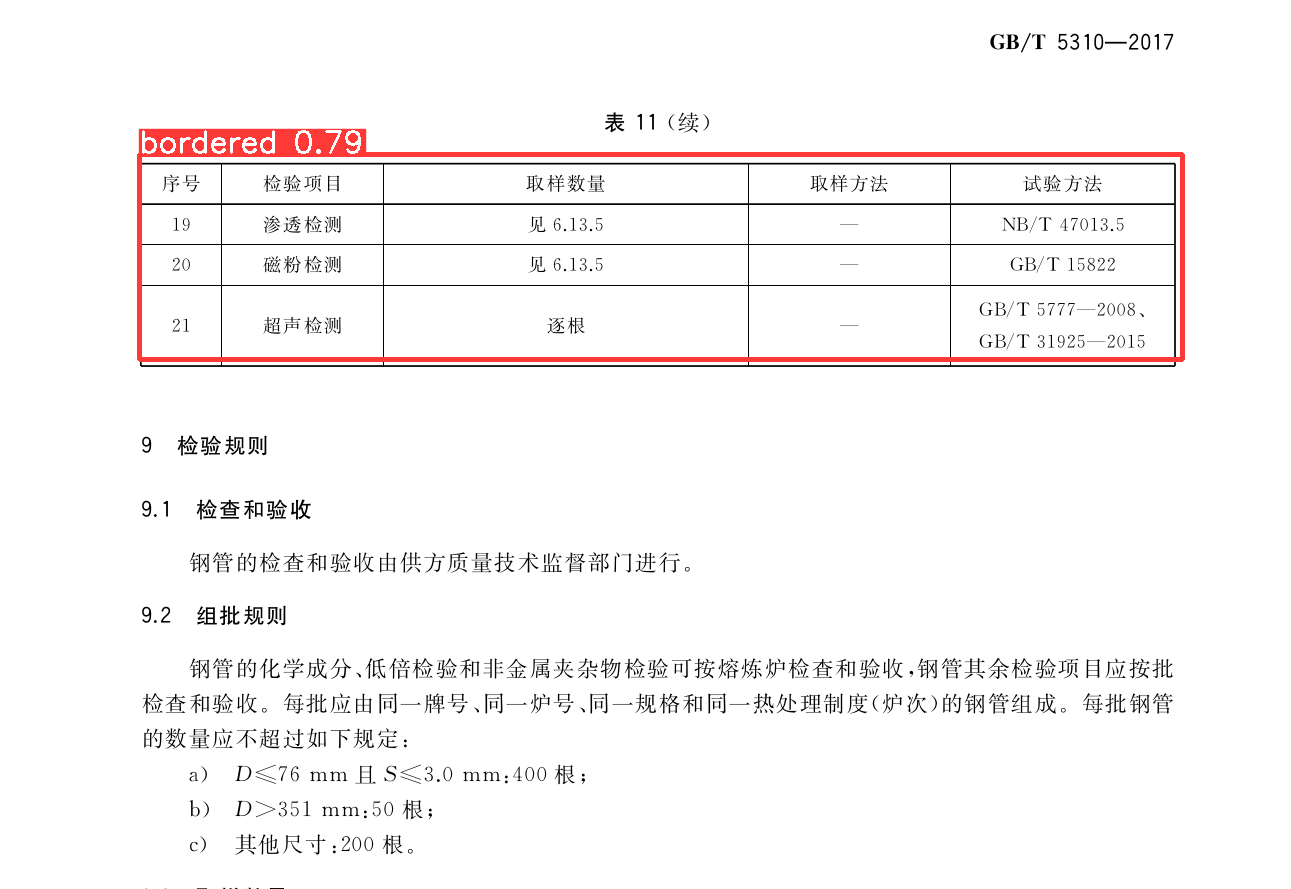